In [1]:
from skimage.metrics import structural_similarity as ssim
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt
from skimage import io, color
import numpy as np
import cv2

(659, 412, 3)


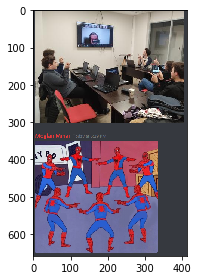

In [2]:
Img = io.imread('Images/foto.png')
io.imshow(Img)
Img = Img[:, :, :3]
print(Img.shape)

In [3]:
def rgb2hsv(image):
    img = image/255
    img_hsv = np.zeros(img.shape, )
    
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            Cmax = np.max(img[i, j])
            Cmin = np.min(img[i, j])
            delta = Cmax - Cmin
            
            # H
            if not delta:
                img_hsv[i, j, 0] = 0
            elif (Cmax == img[i, j, 0]):
                img_hsv[i, j, 0] = 1/6 * (((img[i, j, 1] - img[i, j, 2]) / delta) % 6)
            elif (Cmax == img[i, j, 1]):
                img_hsv[i, j, 0] = 1/6 * (((img[i, j, 2] - img[i, j, 0]) / delta) + 2)
            else:
                img_hsv[i, j, 0] = 1/6 * (((img[i, j, 0] - img[i, j, 1]) / delta) + 4)
                
            # S
            if Cmax == 0:
                img_hsv[i, j, 1] = 0
            else:
                img_hsv[i, j, 1] = delta/Cmax
            
            # V
            img_hsv[i, j, 2] = Cmax
    
    return img_hsv

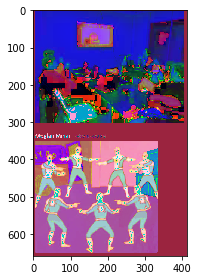

In [4]:
io.imshow(rgb2hsv(Img))

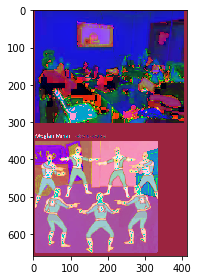

In [5]:
io.imshow(color.rgb2hsv(Img))

In [6]:
def contrastBrightness(image, contrast,brightness):
    new_image = np.zeros(image.shape, image.dtype)
    
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            for k in range(image.shape[2]):
                new_image[i, j, k] =  np.clip(image[i, j, k]* contrast + brightness, 0, 255)
    return new_image

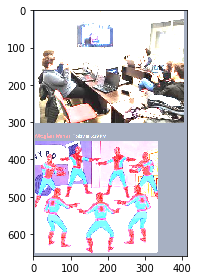

In [7]:
io.imshow(contrastBrightness(Img, 3, 5))

In [8]:
images = list()
for i in range(10, -15, -5):
    for j in range(-10, 15, 5):
        if i == 0 and j == 0:
            images.append(contrastBrightness(Img, 1, 1))
        else:
            images.append(contrastBrightness(Img, i, j))

In [9]:
for i in range(len(images)):
    io.imsave(f'Images/img{i}.png', images[i])

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Images/img10.png is a low contrast image
  
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Images/img11.png is a low contrast image
  
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Images/img13.png is a low contrast image
  
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Images/img14.png is a low contrast image
  
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Images/img15.png is a low contrast image
  
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Images/img16.png is a low contrast image
  
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_l

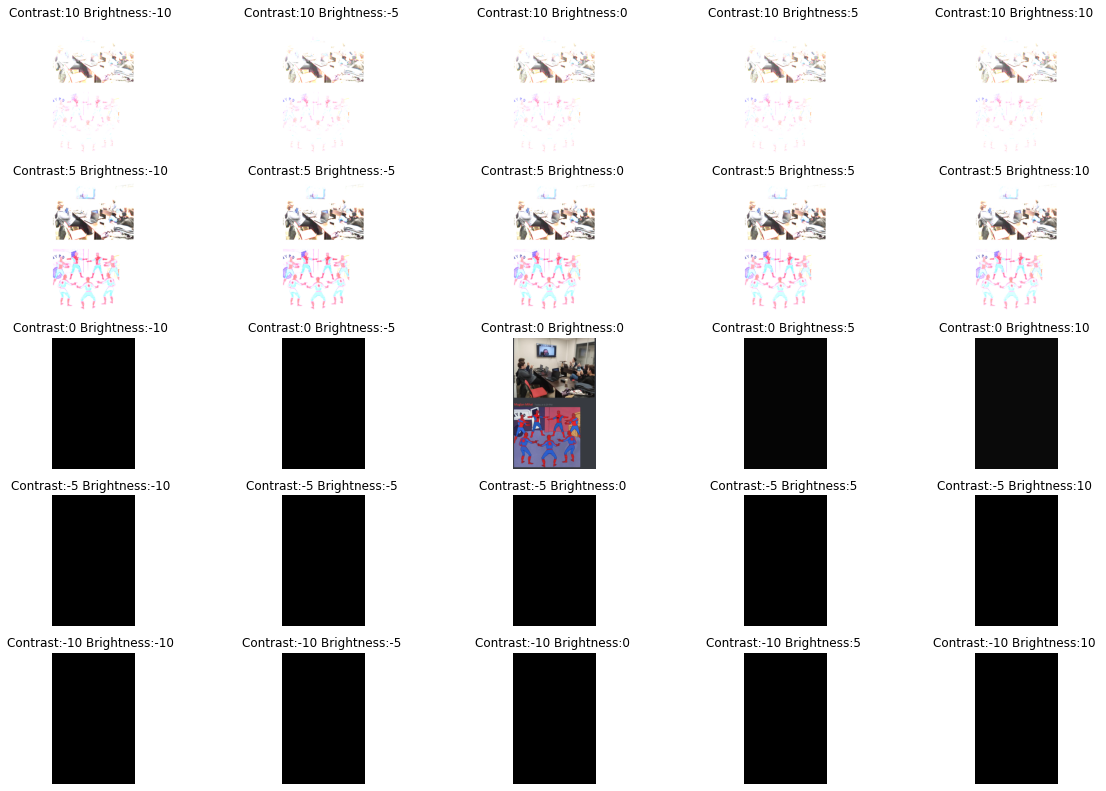

In [10]:
# create figure
fig = plt.figure(figsize=(20, 14))
  
# setting values to rows and column variables
rows = 5
columns = 5
  
# reading images
images = []
for i in range(25):
    # images.append(io.imread(f'Images/img{i}.png'))
    img = io.imread(f'Images/img{i}.png')
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Contrast:{i//5*-5 + 10} Brightness:{i%5*5-10} ')

In [11]:
def ssimCompare(image1, image2):
    img1 = cv2.resize(image1, dsize = image1.shape[:2])
    img2 = cv2.resize(image2, dsize = image1.shape[:2])
    return round(ssim(img1, img2, data_range= img2.max()-img2.min(), multichannel=True),4)

In [12]:
def imageList(image):
    grey = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # io.imshow(grey)
    
    images = []
    images.append(grey)
    images.append(cv2.medianBlur(grey, 3))
    images.append(gaussian_filter(grey, sigma=0))
    images.append(cv2.bilateralFilter(grey, 3, 75, 75))
    
    return images
                
    
imgs = imageList(Img)

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0.Please use `channel_axis` instead.
  after removing the cwd from sys.path.


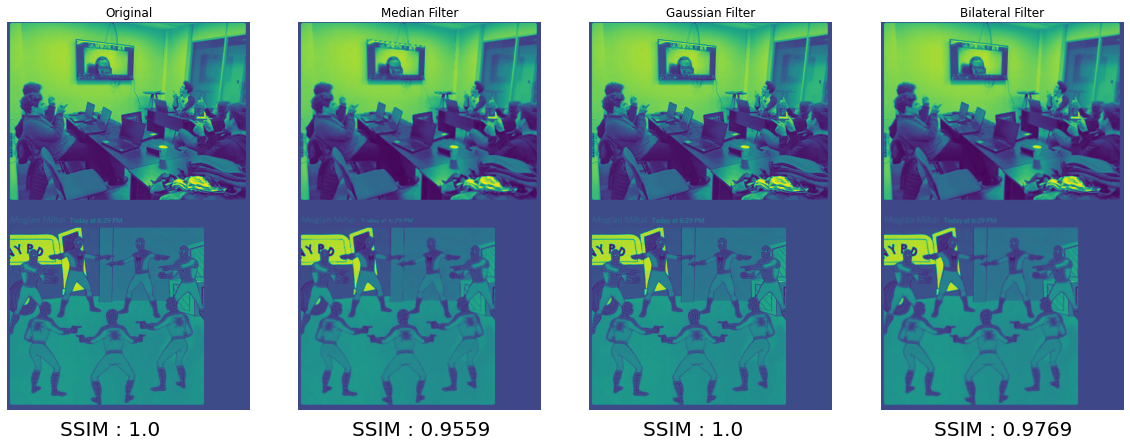

In [13]:
# create figure
fig = plt.figure(figsize=(20, 14))
titles = ['Original', 'Median Filter', 'Gaussian Filter', 'Bilateral Filter']
  
# setting values to rows and column variables
rows = 1
columns = 4
    
for i in range(len(imgs)):
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(imgs[i])
    plt.axis('off')
    plt.title(titles[i])
    plt.text(90, 700, 'SSIM : ' + str(ssimCompare(imgs[0], imgs[i])), family='sans-serif', size=20)